# Module 3 - Fundamentals of Statistics

## Basic coin flipping experiment

In [1]:
from scipy.stats import bernoulli #scipy library related to science
p_true=1/2.0  #probablity of heads or tails       
fp=bernoulli(p_true) # Create bernoulli random variable
xs = fp.rvs(10000)     # Generate some samples

In [4]:
xs # 1 is heads and zero is tails

array([0, 1, 0, ..., 1, 1, 0])

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([5100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4900.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

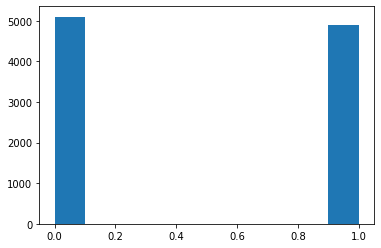

In [6]:
# Plot the distriburion of `xs`
plt.hist(xs)

## Roll the dice

In [10]:
# Create a random variable storing the result of the roll
from random import randint
one_die_roll = randint(1,6) #randint generates a number within a range
one_die_roll

3

In [11]:
# Create a list containing the results from ten rolls
ten_die_roll = [randint(1,6) for x in range(10)]

In [15]:
ten_die_roll

[1, 6, 4, 3, 5, 1, 2, 3, 2, 3]

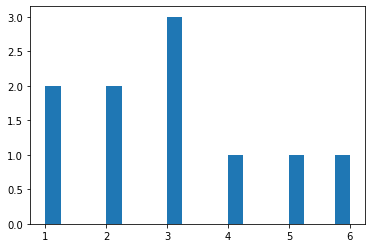

In [16]:
# Plot the distribution of our ten die rolls
plt.hist(ten_die_roll,bins=20)
plt.show()

In [17]:
# Create a list containing the result from one thousand rolls
onek_die_roll = [randint(1,6) for x in range(1000)]

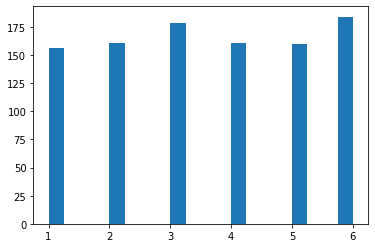

In [18]:
# Plot the distribution of one thousand die rolls
plt.hist(onek_die_roll, bins=20)
plt.show()

In [19]:
# Create a list containing the result of ten thousand rolls
tenk_die_roll = [randint(1,6) for x in range(10000)]

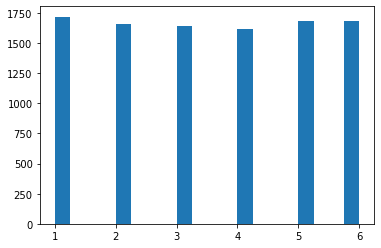

In [20]:
# Plot the distribution of ten thousand die rolls
plt.hist(tenk_die_roll, bins=20)
plt.show()

In [22]:
# Create a function to sum the results of two die rolls
def roll_two(rolls):
    total = [] #blank list to store total
    
    for _ in range(rolls): #_ not be using placeholder in for loop but want to loop
        roll_1 = randint(1,6)
        roll_2 = randint(1,6)
        total += [(roll_1 + roll_2)]
        
    return total

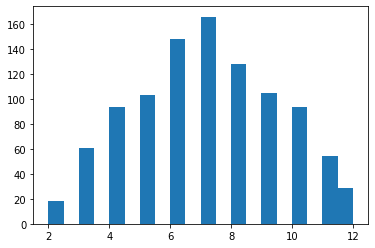

In [23]:
# Create a series containing the result from adding 1,000 die rolls
rolls = 1000
new_roll = roll_two(rolls)

# Plot the distribution of these die rolls
plt.hist(new_roll, bins=20)
plt.show()

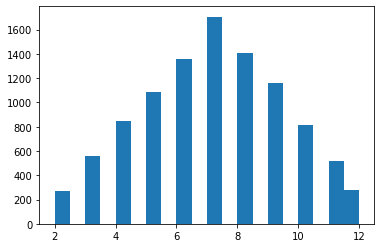

In [24]:
# Create a series containing the results from adding 10,000 die rolls
rolls = 10000
new_roll = roll_two(rolls)

# Plot the distribution of these die rolls
plt.hist(new_roll, bins=20)
plt.show()

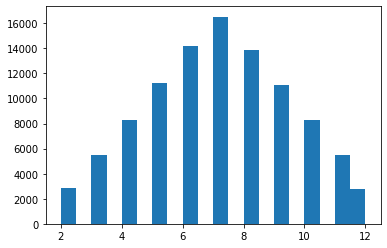

In [25]:
# Create a series containing the results from adding 100,000 die rolls
rolls = 100000
new_roll = roll_two(rolls)

# Plot the distribution of these die rolls
plt.hist(new_roll, bins=20)
plt.show()

# T-test

In [26]:
import pandas as pd

In [28]:
# Read into the data called `bodytemp`
body = pd.read_csv("data/bodytemp.csv")

In [29]:
# View our data
body.head() #0 for male sex, 1 for female

,temp,sex,bpm
0,96.3,0,70
1,96.7,0,71
2,96.9,0,74
3,97.0,0,80
4,97.1,0,73


In [31]:
# Let's run a t-test targeting men to test a null hypothesis that body temperature is 98.6 degrees Fahrenheit.

import scipy.stats
true_mu = 98.6 #true average we are attempting to test

scipy.stats.ttest_1samp(body[body.sex == 0]["temp"], true_mu) #run ttest, column temp, compare to true_mu

#good p value is < 0.05

Ttest_1sampResult(statistic=-5.715757449318526, pvalue=3.083840317315035e-07)

This p-value means that there is only a 0.00003084% chance we would see these results from purely random data!

In [32]:
## Let's do the same thing now but use Celsius instead:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [33]:
# Now create a new column storing the temperature in Celsius:
body["temp_C"] = fahr_to_celsius(body["temp"])

In [34]:
body.head()

,temp,sex,bpm,temp_C
0,96.3,0,70,35.722222
1,96.7,0,71,35.944444
2,96.9,0,74,36.055556
3,97.0,0,80,36.111111
4,97.1,0,73,36.166667


In [35]:
# Run a t-test targeting men to test the null hypothesis that body temperature is 37 degrees Celsius.

import scipy.stats
true_mu = 37

scipy.stats.ttest_1samp(body[body.sex == 0]["temp_C"], true_mu)

Ttest_1sampResult(statistic=-5.715757449318657, pvalue=3.083840317313486e-07)

In [36]:
# Run a t-test for the null hypothesis that men and women have the same body temperature. 
scipy.stats.ttest_ind(body[body.sex == 0]["temp_C"], body[body.sex == 1]["temp_C"]) #pass in temp in c for males and pass in temp in c for female

Ttest_indResult(statistic=-2.285434538165598, pvalue=0.02393188312239634)

This p-value means that there is only a 2% chance we would see these results from purely random data.

# Q-Q plots
data normal distributed?


In [37]:
# Import libraries and read salary data
import pandas as pd
from matplotlib import pyplot as plt
import pylab 
import scipy.stats as stats
salary = pd.read_csv("data/salary.csv")

In [38]:
# View our data
salary.head()

,hourlywage,Hours per week
0,34.48,29.240
1,64.09,43.045
2,16.12,16.060
3,48.71,37.355
4,35.93,26.965


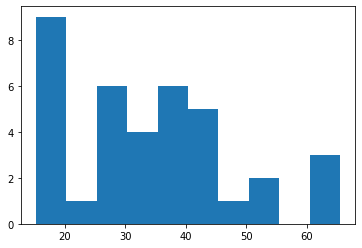

In [39]:
# Plot the distribution of the `hourlywage` column
plt.hist(salary["hourlywage"])
plt.show()

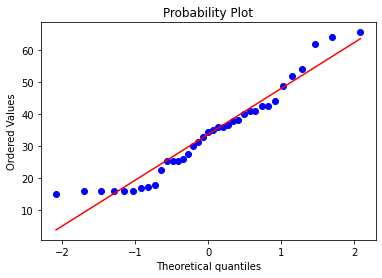

In [40]:
# Run a Q-Q plot for the `hourlywage` column
stats.probplot(salary["hourlywage"], dist="norm", plot=pylab)
plt.show()

Data is shown to be not normally distributed. dots should be on or extremely close to line

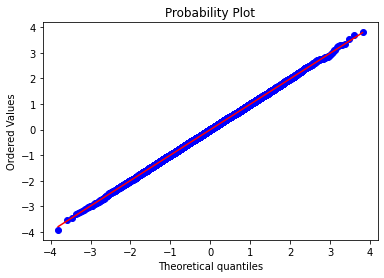

In [41]:
#normal data
## Create a Q-Q plot for normal data
import numpy as np 
measurements = np.random.normal(0, 1, 10000)
stats.probplot(measurements, dist="norm", plot=pylab) #testing for normal dist. 
plt.show()

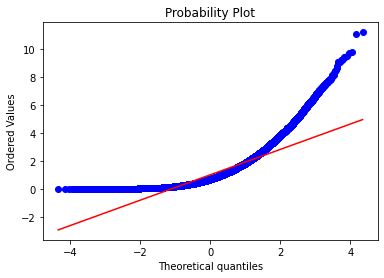

In [42]:
## Next, create a Q-Q plot for abnormal data
import numpy as np 
measurements = np.random.exponential(1,100000)
stats.probplot(measurements, dist="norm", plot=pylab)
plt.show()